In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

from scipy.stats import chi2_contingency
from scipy.stats import chi2

df_oxidation = pd.read_csv('./dataset_origin/Oxidation.csv')
df_photo_soft = pd.read_csv('./dataset_origin/Photo_softbake.csv')
df_photo_litho = pd.read_csv('./dataset_origin/Photo_lithograpy.csv')
df_etching = pd.read_csv('./dataset_origin/Etching.csv')
df_ion = pd.read_csv('./dataset_origin/Ion_Implantation.csv')
df_inspect = pd.read_csv('./dataset_origin/final_data.csv')

print(len(df_inspect))

1702


In [2]:
path = []
for i in range(len(df_inspect)):
    temp = ''
    temp = str(df_oxidation['Ox_Chamber'][i]) + str(df_photo_soft['photo_soft_Chamber'][i]) + \
    str(df_photo_litho['lithography_Chamber'][i]) + str(df_etching['Etching_Chamber'][i]) + \
    str(df_ion['Chamber_Num'][i])
    path.append(temp)
    
print(len(path))

df_inspect['Path'] = path
df_inspect

1702


,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120.0,...,3.011187e+17,6.000012e+17,30795.934,103.433,854.0,154,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137.0,...,3.026639e+17,6.000008e+17,32135.618,105.552,895.0,156,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116.0,...,2.983347e+17,5.999989e+17,31057.895,102.598,898.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143.0,...,2.999225e+17,5.999997e+17,32140.566,102.963,879.0,155,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76.0,...,3.018136e+17,6.000004e+17,31986.009,101.419,882.0,155,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21.0,...,3.009325e+17,6.000003e+17,32248.621,101.503,868.0,152,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,33111
1698,1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22.0,...,3.006733e+17,6.000003e+17,32241.426,101.061,867.0,152,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,33222
1699,1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21.0,...,2.990013e+17,5.999991e+17,32245.574,101.506,868.0,152,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,33333
1700,1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20.0,...,2.992776e+17,6.000012e+17,32259.412,101.360,868.0,152,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,11133


In [3]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path)
all_pd_path

,0
0,32122
1,13133
2,13211
3,31133
4,13233
...,...
76,31333
77,12211
78,33333
79,32311


In [4]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path,columns=['Path'])
data_list=[]
for c in all_path:
    print(c)
    data_by_path= pd.DataFrame()
    for i in range(len(df_inspect)):
        if df_inspect.loc[i,['Path']][0]==c:
            a=pd.DataFrame(df_inspect.loc[i])
            data_by_path=pd.concat([data_by_path,a],axis=1)

    data_list.append(data_by_path.transpose())
    print(len(data_list))


32122
1
13133
2
13211
3
31133
4
13233
5
21311
6
11311
7
31322
8
23233
9
11322
10
33133
11
32333
12
32222
13
12333
14
22322
15
22122
16
21322
17
21211
18
23333
19
31233
20
33122
21
11333
22
12311
23
12133
24
12233
25
13122
26
23311
27
22333
28
33322
29
33311
30
11211
31
32233
32
11133
33
11122
34
13322
35
33222
36
23111
37
32111
38
23211
39
31122
40
13222
41
12122
42
22133
43
11111
44
21122
45
22211
46
23322
47
31311
48
11233
49
33233
50
22311
51
22222
52
31211
53
13111
54
13333
55
12111
56
23122
57
21233
58
33211
59
12222
60
21133
61
21333
62
22233
63
31222
64
31111
65
13311
66
32211
67
21111
68
22111
69
12322
70
23222
71
21222
72
32322
73
32133
74
11222
75
23133
76
31333
77
12211
78
33333
79
32311
80
33111
81


In [5]:
data_list[0]

,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path
217,217,NOLSM434172434,3,Oxidation,dry,1209.09,O2,30.34,0.203,50,...,3.02054e+17,5.99999e+17,31593.1,103.087,884,156,96,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 0 0 0 0 0 0 ...,32122
220,220,NOLSM437175437,3,Oxidation,dry,1065.18,O2,35.89,0.196,184,...,3.00683e+17,5.99999e+17,31510.6,101.757,910,157,50,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 2 0 0 0 0 0 0 ...,32122
223,223,NOLSM440178440,3,Oxidation,wet,994.896,H2O,33.83,0.224,69,...,3.00327e+17,6e+17,31580.2,104.285,898,155,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,32122
1000,1000,NOLSM677262677,3,Oxidation,dry,886.981,O2,22.48,0.222,23,...,3.00554e+17,5.99999e+17,32478.8,105.858,860,159,102,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 1 2 0 0 0 0 0 0 ...,32122
1003,1003,NOLSM680265680,3,Oxidation,dry,884.601,O2,22.48,0.223,25,...,2.98006e+17,6.00001e+17,32473,105.952,861,159,93,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 ...,32122
1006,1006,NOLSM683268683,3,Oxidation,dry,881.016,O2,22.48,0.225,232,...,3.00573e+17,6.00002e+17,32477.3,106.419,861,160,84,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 1 0 0 0 0 0 0 ...,32122
1189,1191,NOLSM19384193,3,Oxidation,dry,1170.62,O2,33.16,0.207,28,...,3.01664e+17,5.99999e+17,31290.6,106.97,870,157,106,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 0 0 0 0 0 0 ...,32122
1192,1194,NOLSM19687196,3,Oxidation,dry,1177.66,O2,34.34,0.208,64,...,2.99735e+17,6.00001e+17,32162.1,102.221,898,156,147,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 2 0 0 0 0 0 0 ...,32122
1195,1197,NOLSM199810199,3,Oxidation,dry,1090.46,O2,30.16,0.209,163,...,3.00406e+17,6.00001e+17,31722.4,104.227,907,155,96,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 2 0 0 0 0 0 0 ...,32122


In [6]:
count=0
for i in data_list:
    for j in range(len(i)):
        count+=1
print(count)

1702


In [7]:
len(data_list)

81

In [8]:
all_list=[]
all_path=[]
for j in range(len(data_list)):
    target_mean = data_list[j]['Target'].mean()
    #표준편차 루트C
    target_std = math.sqrt(target_mean)

    #관리 상한(UCL)
    ucl = target_mean + 3*target_std
    cl = target_mean
    lcl = target_mean - 3*target_std
    control=True
    group=data_list[j]['Target']
    group_pd=pd.DataFrame(group)

    index_list = group_pd.index
    out_list=[]
    out_list_num=[]
    for i in index_list:
        if group_pd.loc[i,['Target']][0]>ucl or group_pd.loc[i,['Target']][0]<lcl:
            out_list.append(i)
            out_list_num.append(group_pd.loc[i,['Target']][0])
            print("out of control limit")
            control=False

    if control==True:
        print("All group within control limit")

    out_pd=pd.DataFrame(out_list)
    out_pd_num=pd.DataFrame(out_list_num)
    out_pd.columns=['index']
    out_pd_num.columns=['Target']
    all_list.append(len(out_pd))

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit


In [9]:
data_dict={}
for i in range(len(data_list)):
    data_list[i]['Path']
    idx=data_list[i].index
    idx=idx[0]
    path = data_list[i]['Path'][idx]
    dum_Data=data_list[i].drop(['Path'],axis=1)
    #mean_Data=np.mean(data_list[i]['Target'])
    data_dict[path]=dum_Data

In [10]:
sum=0
for key,values in data_dict.items():
    sum+=len(values)
print(sum)

1702


In [11]:
length=[]
for keys,values in data_dict.items():
    length.append(len(values))
pd_length=pd.DataFrame(length,columns=['cnt'])
pd_length.sum()

cnt    1702
dtype: int64

In [12]:
pd.set_option('display.max_rows', None)

a=pd.DataFrame(all_list,columns=['Outlier'])
outlier_path=pd.concat([a,all_pd_path],axis=1)
outlier_path

out_path_cnt=pd.concat([outlier_path,pd_length],axis=1)
asd=out_path_cnt['Outlier']/out_path_cnt['cnt']
asd=pd.DataFrame(asd,columns=['ratio'])
asd
out_all_path=pd.concat([out_path_cnt,asd],axis=1)
out_all_path


,Outlier,Path,cnt,ratio
0,2,32122,9,0.222222
1,13,13133,22,0.590909
2,4,13211,12,0.333333
3,17,31133,26,0.653846
4,8,13233,12,0.666667
5,12,21311,29,0.413793
6,12,11311,29,0.413793
7,5,31322,9,0.555556
8,4,23233,9,0.444444
9,4,11322,12,0.333333


In [13]:
mean_data = [np.mean(data_list[x]['Target']) for x in range(len(data_list))]
mean_data = pd.DataFrame(mean_data,columns=['mean'])

In [14]:
out_all_path=pd.concat([out_all_path,mean_data],axis=1)

In [15]:
sum_data = [np.sum(data_list[x]['Target']) for x in range(len(data_list))]
sum_data = pd.DataFrame(sum_data,columns=['sum'])
sum_data

,sum
0,852
1,2587
2,890
3,3114
4,1055
5,2537
6,2813
7,1382
8,908
9,1186


In [16]:
out_all_path=pd.concat([out_all_path,sum_data],axis=1)

In [17]:
out_all_path

,Outlier,Path,cnt,ratio,mean,sum
0,2,32122,9,0.222222,94.666667,852
1,13,13133,22,0.590909,117.590909,2587
2,4,13211,12,0.333333,74.166667,890
3,17,31133,26,0.653846,119.769231,3114
4,8,13233,12,0.666667,87.916667,1055
5,12,21311,29,0.413793,87.482759,2537
6,12,11311,29,0.413793,97.000000,2813
7,5,31322,9,0.555556,153.555556,1382
8,4,23233,9,0.444444,100.888889,908
9,4,11322,12,0.333333,98.833333,1186


In [18]:
by_cnt=out_all_path.sort_values(by='cnt',ascending=False)
by_cnt

,Outlier,Path,cnt,ratio,mean,sum
51,29,22222,45,0.644444,115.377778,5192
40,23,13222,43,0.534884,100.302326,4313
12,16,32222,43,0.372093,105.813953,4550
70,17,23222,43,0.395349,110.046512,4732
71,21,21222,42,0.500000,106.738095,4483
74,16,11222,41,0.390244,100.170732,4107
63,17,31222,35,0.485714,115.314286,4036
35,16,33222,34,0.470588,68.852941,2341
59,14,12222,33,0.424242,112.363636,3708
32,16,11133,30,0.533333,86.533333,2596


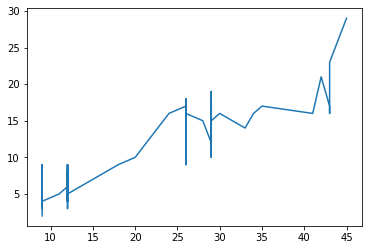

In [19]:
plt.plot(by_cnt['cnt'],by_cnt['Outlier'])

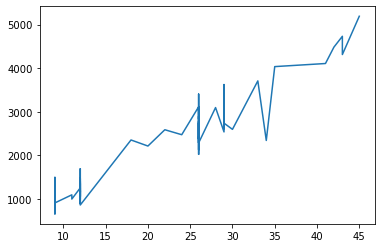

In [20]:
plt.plot(by_cnt['cnt'],by_cnt['sum'])

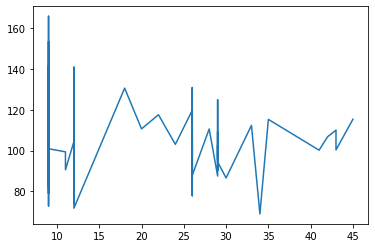

In [21]:
plt.plot(by_cnt['cnt'],by_cnt['mean'])

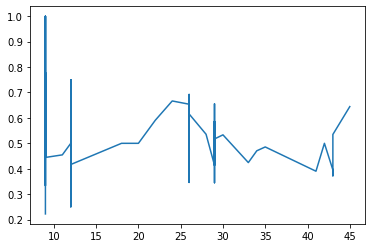

In [22]:
plt.plot(by_cnt['cnt'],by_cnt['ratio'])

In [23]:
by_Outlier=out_all_path.sort_values(by='Outlier',ascending=False)
by_Outlier=by_Outlier.reset_index(drop=True)

In [50]:
by_ratio=out_all_path.sort_values(by='ratio',ascending=False)
by_ratio=by_ratio.reset_index(drop=True)
by_ratio

,Outlier,Path,cnt,ratio,mean,sum
0,9,31233,9,1.000000,134.777778,1213
1,9,31211,9,1.000000,166.000000,1494
2,7,31122,9,0.777778,141.555556,1274
3,7,33233,9,0.777778,82.555556,743
4,9,12211,12,0.750000,80.250000,963
5,9,12122,12,0.750000,91.000000,1092
6,9,13322,12,0.750000,96.083333,1153
7,18,31111,26,0.692308,130.961538,3405
8,8,13233,12,0.666667,87.916667,1055
9,16,22133,24,0.666667,103.041667,2473


In [51]:
out2=pd.DataFrame(data_dict['31233']['Target'])
out1=pd.DataFrame(data_dict['31211']['Target'])
out3=pd.DataFrame(data_dict['31122']['Target'])
out4=pd.DataFrame(data_dict['33233']['Target'])
out5=pd.DataFrame(data_dict['12122']['Target'])

out_final = pd.concat([out1,out2])
out_final = pd.concat([out_final,out3])
out_final = pd.concat([out_final,out4])
out_final = pd.concat([out_final,out5])
out_final
out_final.sort_index()

,Target
163,118
166,57
169,159
171,61
173,97
174,86
176,54
177,84
179,48
281,24


In [62]:
in1=pd.DataFrame(data_dict['32122']['Target'])
in2=pd.DataFrame(data_dict['11211']['Target'])
in3=pd.DataFrame(data_dict['11322']['Target'])
in4=pd.DataFrame(data_dict['22322']['Target'])
in5=pd.DataFrame(data_dict['13211']['Target'])

in_final = pd.concat([in1,in2])
in_final = pd.concat([in_final,in3])
in_final = pd.concat([in_final,in4])
in_final = pd.concat([in_final,in5])
in_final.sort_index()


,Target
73,15
76,120
79,83
217,96
220,50
223,78
333,96
336,153
339,216
343,75


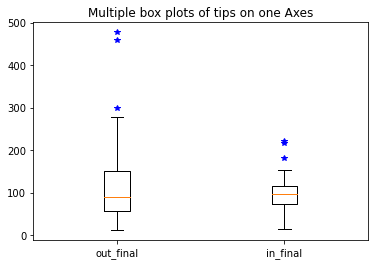

In [54]:
fig, ax = plt.subplots()

ax.boxplot([out_final['Target'], in_final['Target']], sym="b*")

plt.title('Multiple box plots of tips on one Axes')

plt.xticks([1, 2], 

           ['out_final', 'in_final'])

plt.show()


In [55]:
import pandas as pd
import scipy.stats as stats

In [56]:
index_out1 = 0
index_out0 = 0

index_in1 = 0
index_in0 = 0

for i in out_final["Target"]:
    if i >= 200:
        index_out1 +=1
    else: index_out0 +=1
    
for i in in_final["Target"]:
    if i >= 200:
        index_in1 +=1
    else: index_in0 +=1
        
xo = [index_out1, index_out0]
xe = [index_in1, index_in0]



In [57]:
index_out1

8

In [58]:
index_out0

40

In [59]:
index_in1

2

In [60]:
index_in0

52

In [61]:
from scipy.stats import chisquare

result = chisquare(xo, f_exp = xe)
result

Power_divergenceResult(statistic=20.76923076923077, pvalue=5.180869465658887e-06)

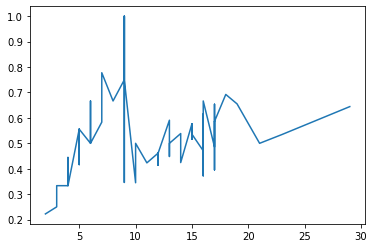

In [30]:
plt.plot(by_Outlier['Outlier'],by_Outlier['ratio'])

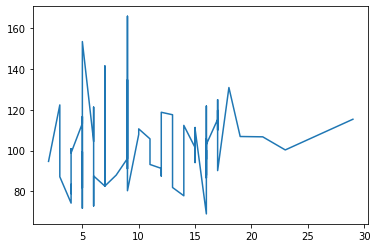

In [31]:
plt.plot(by_Outlier['Outlier'],by_Outlier['mean'])

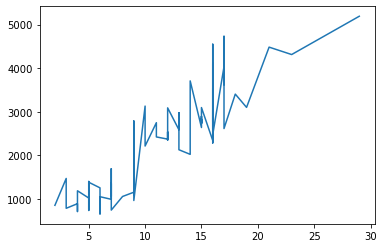

In [32]:
plt.plot(by_Outlier['Outlier'],by_Outlier['sum'])

In [33]:
out_all_path.sort_values(by='ratio',ascending=False)

,Outlier,Path,cnt,ratio,mean,sum
19,9,31233,9,1.000000,134.777778,1213
52,9,31211,9,1.000000,166.000000,1494
39,7,31122,9,0.777778,141.555556,1274
49,7,33233,9,0.777778,82.555556,743
77,9,12211,12,0.750000,80.250000,963
41,9,12122,12,0.750000,91.000000,1092
34,9,13322,12,0.750000,96.083333,1153
64,18,31111,26,0.692308,130.961538,3405
4,8,13233,12,0.666667,87.916667,1055
42,16,22133,24,0.666667,103.041667,2473


Text(0, 0.5, 'count')

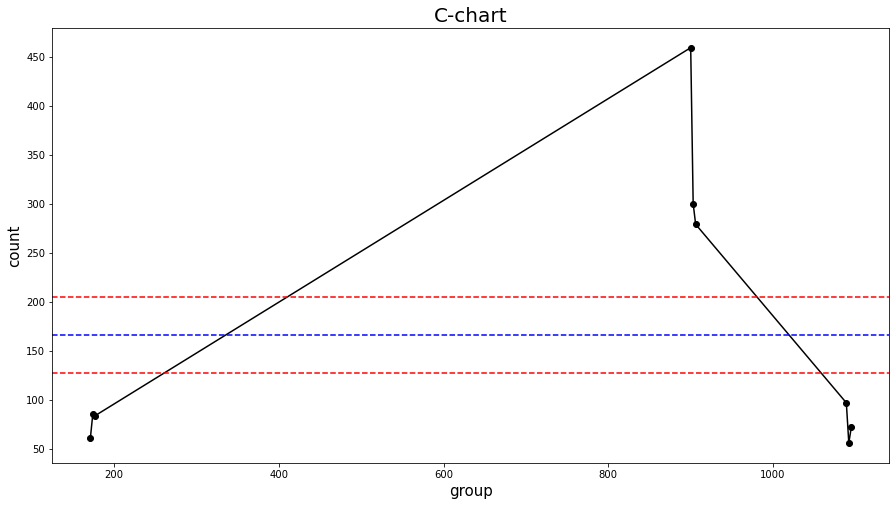

In [34]:

u_data=data_dict['31211']
target_mean = u_data['Target'].mean()
#표준편차 루트C
target_std = math.sqrt(target_mean)

#관리 상한(UCL)
ucl = target_mean + 3*target_std
cl = target_mean
lcl = target_mean - 3*target_std

fig = plt.figure(figsize=(15,8))
plt.plot(u_data['Target'],linestyle='-',marker='o',color='black')
plt.axhline(ucl,color='red',linestyle='dashed')
plt.axhline(lcl,color='red',linestyle='dashed')
plt.axhline(cl,color='blue',linestyle='dashed')

plt.title("C-chart",fontsize=20)
plt.xlabel("group",fontsize=15)
plt.ylabel("count",fontsize=15)

In [35]:
upper_path=by_Outlier.loc[0:3,['Path']]
lower_path=by_Outlier.loc[78:81,['Path']]

In [36]:
upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

In [37]:
upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

159


In [38]:
upper_list

[['22222'], ['13222'], ['21222'], ['22111']]

In [852]:
lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))

30


In [853]:
lower_list

[['11211'], ['22322'], ['32122']]

In [854]:
from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))

ShapiroResult(statistic=0.830115795135498, pvalue=2.6139685034565208e-12)
ShapiroResult(statistic=0.9450629353523254, pvalue=0.1245388314127922)


In [855]:
t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

In [856]:
print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

2Sample ttest
t:-0.289
p:0.773


In [857]:
from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

,U-val,tail,p-val,RBC,CLES
MWU,2609.5,greater,0.207476,-0.09413,0.547065


## lower_values<upper_values라고 할 수 있다

<AxesSubplot:>

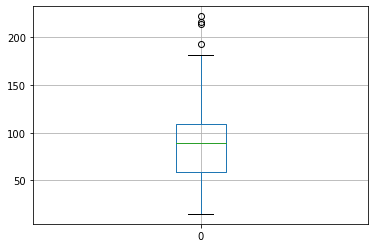

In [932]:
a=pd.DataFrame(lower_values)
a.boxplot()



<AxesSubplot:>

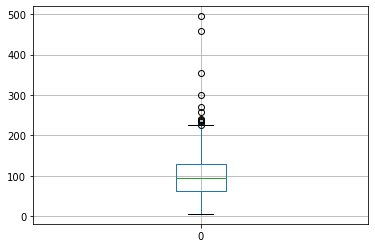

In [859]:
b=pd.DataFrame(upper_values)
b.boxplot()

In [860]:
upper_list

[['22222'], ['13222'], ['21222'], ['22111']]

In [861]:
sum2=0
for i in upper_list:
    sum2+=len(data_dict[i[0]])
sum2

159

In [862]:
sum2=0
for i in lower_list:
    sum2+=len(data_dict[i[0]])
sum2

30

### 200개 이상 카운트

In [863]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

[38, 41, 38, 27]

In [864]:
sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

144

In [865]:
low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

[11, 9, 9]

In [866]:
sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

29

In [867]:
table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table

[[15, 144], [1, 29]]

In [868]:
stat, p, dof, expected = chi2_contingency(table)


print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

chi-square test
chisq:0.553
p:0.457
degree of freedom:1
expected_value::
[[ 13.46 145.54]
 [  2.54  27.46]]


## ratio 기준

In [817]:
by_ratio

,Outlier,Path,cnt,ratio,mean,sum
0,9,31211,9,1.000000,166.000000,1494
1,9,31233,9,1.000000,134.777778,1213
2,7,31122,9,0.777778,141.555556,1274
3,7,33233,9,0.777778,82.555556,743
4,9,12122,12,0.750000,91.000000,1092
5,9,13322,12,0.750000,96.083333,1153
6,9,12211,12,0.750000,80.250000,963
7,18,31111,26,0.692308,130.961538,3405
8,8,13233,12,0.666667,87.916667,1055
9,16,22133,24,0.666667,103.041667,2473


In [819]:
upper_path=by_ratio.loc[0:10,['Path']]
lower_path=by_ratio.loc[71:81,['Path']]


upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

In [821]:
upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))


from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))

143
236
ShapiroResult(statistic=0.8310544490814209, pvalue=1.5371958914101036e-11)
ShapiroResult(statistic=0.9586392641067505, pvalue=2.5882941372401547e-06)


In [822]:
t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

2Sample ttest
t:-0.723
p:0.47


,U-val,tail,p-val,RBC,CLES
MWU,18027.5,greater,0.132325,-0.06836,0.53418


In [823]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

128

In [824]:
low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[ 10.5646438 132.4353562]
 [ 17.4353562 218.5646438]]
chi-square test
chisq:2.542
p:0.111
degree of freedom:1
expected_value::
[[ 10.565 132.435]
 [ 17.435 218.565]]


In [870]:
by_Outlier=out_all_path.sort_values(by='Outlier',ascending=False)
over20=by_Outlier[by_Outlier['cnt']>20]
over20

,Outlier,Path,cnt,ratio,mean,sum
76,29,22222,45,0.644444,115.377778,5192
19,23,13222,43,0.534884,100.302326,4313
65,21,21222,42,0.500000,106.738095,4483
68,19,22111,29,0.655172,106.896552,3100
52,18,31111,26,0.692308,130.961538,3405
5,17,21111,29,0.586207,124.965517,3624
73,17,12111,29,0.586207,90.137931,2614
58,17,31133,26,0.653846,119.769231,3114
43,17,31222,35,0.485714,115.314286,4036
4,17,23222,43,0.395349,110.046512,4732


In [873]:
over20=over20.reset_index(drop=True)
over20

,Outlier,Path,cnt,ratio,mean,sum
0,29,22222,45,0.644444,115.377778,5192
1,23,13222,43,0.534884,100.302326,4313
2,21,21222,42,0.500000,106.738095,4483
3,19,22111,29,0.655172,106.896552,3100
4,18,31111,26,0.692308,130.961538,3405
5,17,21111,29,0.586207,124.965517,3624
6,17,12111,29,0.586207,90.137931,2614
7,17,31133,26,0.653846,119.769231,3114
8,17,31222,35,0.485714,115.314286,4036
9,17,23222,43,0.395349,110.046512,4732


In [901]:
upper_path=over20.loc[0:10,['Path']]
lower_path=over20.loc[32:42,['Path']]


upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))


from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))

KeyError: 0

In [902]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[ 6. 66.]
 [ 5. 55.]]
chi-square test
chisq:4.900
p:0.027
degree of freedom:1
expected_value::
[[ 6. 66.]
 [ 5. 55.]]


In [903]:
from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))


t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

ShapiroResult(statistic=0.8193228244781494, pvalue=5.8997883911615645e-08)
ShapiroResult(statistic=0.9738727807998657, pvalue=0.22478263080120087)
2Sample ttest
t:-1.673
p:0.097


,U-val,tail,p-val,RBC,CLES
MWU,2040.0,less,0.292461,0.055556,0.527778


## under20

In [904]:
by_Outlier=out_all_path.sort_values(by='Outlier',ascending=False)
under20=by_Outlier[by_Outlier['cnt']<20]
under20=under20.reset_index(drop=True)
under20

,Outlier,Path,cnt,ratio,mean,sum
0,9,32333,18,0.500000,130.666667,2352
1,9,12211,12,0.750000,80.250000,963
2,9,31211,9,1.000000,166.000000,1494
3,9,13322,12,0.750000,96.083333,1153
4,9,12122,12,0.750000,91.000000,1092
5,9,31233,9,1.000000,134.777778,1213
6,8,13233,12,0.666667,87.916667,1055
7,7,21322,12,0.583333,99.166667,1190
8,7,21233,12,0.583333,88.166667,1058
9,7,11233,12,0.583333,141.000000,1692


In [908]:
upper_path=under20.loc[0:10,['Path']]
lower_path=under20.loc[26:36,['Path']]


upper_list=upper_path.values.tolist()
lower_list=lower_path.values.tolist()

upper_values=[]
for i in upper_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    upper_values.extend(Target_num)
print(len(upper_values))

lower_values=[]
for i in lower_list:
    Target_num=data_dict[i[0]]['Target'].values.tolist()
    lower_values.extend(Target_num)
print(len(lower_values))


from scipy import stats
print(stats.shapiro(upper_values))
print(stats.shapiro(lower_values))


t_result = stats.ttest_ind(lower_values,upper_values)
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("2Sample ttest")
print("t:{}".format(t))
print("p:{}".format(p))

from pingouin import mwu

results2 = mwu(lower_values,upper_values,
               tail='one-sided')

results2

132
111
ShapiroResult(statistic=0.8448957800865173, pvalue=1.8193416218004188e-10)
ShapiroResult(statistic=0.9498715996742249, pvalue=0.00038412550929933786)
2Sample ttest
t:-2.437
p:0.016


,U-val,tail,p-val,RBC,CLES
MWU,6527.0,less,0.071715,0.109064,0.554532


In [909]:
high_1=[]
all_count=[]
for i in upper_list:
    #data_dict[i[0]]['Target']
    high_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
high_1
high_0=[all_count[i]-high_1[i] for i in range(len(high_1))]
high_0

sum_high_1=0
for x in high_1:
    sum_high_1+=x
sum_high_1


sum_high_0=0
for x in high_0:
    sum_high_0+=x
sum_high_0

low_1=[]
all_count=[]
for i in lower_list:
    #data_dict[i[0]]['Target']
    low_1.append(len(data_dict[i[0]]['Target'][data_dict[i[0]]['Target']>200]))
    all_count.append(len(data_dict[i[0]]['Target']))
    
low_1
low_0=[all_count[i]-low_1[i] for i in range(len(low_1))]
low_0

sum_low_1=0
for x in low_1:
    sum_low_1+=x
sum_low_1


sum_low_0=0
for x in low_0:
    sum_low_0+=x
sum_low_0

table=[[sum_high_1,sum_high_0],[sum_low_1,sum_low_0]]
table

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=1
[[  9.77777778 122.22222222]
 [  8.22222222 102.77777778]]
chi-square test
chisq:5.392
p:0.020
degree of freedom:1
expected_value::
[[  9.778 122.222]
 [  8.222 102.778]]


<AxesSubplot:>

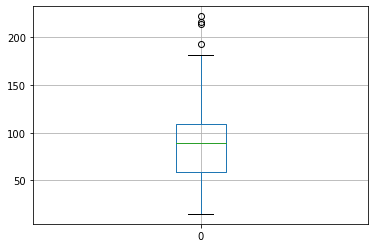

In [910]:
a=pd.DataFrame(lower_values)
a.boxplot()

<AxesSubplot:>

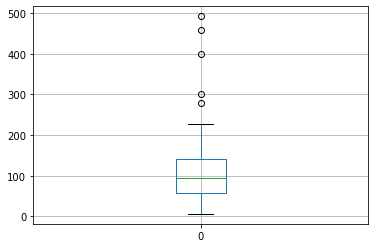

In [911]:
b=pd.DataFrame(upper_values)
b.boxplot(0)